In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
def makeDataFrame(metric, name):
    dfSD = pd.read_csv(f"Training_Losses_Times/Data/{metric}/sd{name}_version_0.csv")
    dfMG = pd.read_csv(f"Training_Losses_Times/Data/{metric}/mog{name}_version_0.csv")
    dfVP = pd.read_csv(f"Training_Losses_Times/Data/{metric}/vamp{name}_version_0.csv")
    dfNF = pd.read_csv(f"Training_Losses_Times/Data/{metric}/flow{name}_version_0.csv")
    df = dfSD.copy()
    df = df.drop(["Step","Value"],axis=1)
    df["SN"] = dfSD["Value"]
    df["MG"] = dfMG["Value"]
    df["VP"] = dfVP["Value"]
    df["NF"] = dfNF["Value"]
    df["Relative Time SD"] = dfSD["Wall time"]-dfSD["Wall time"][0]
    df["Relative Time MG"] = dfMG["Wall time"]-dfMG["Wall time"][0]
    df["Relative Time VP"] = dfVP["Wall time"]-dfVP["Wall time"][0]
    df["Relative Time NF"] = dfNF["Wall time"]-dfNF["Wall time"][0]
    return df

In [3]:
def getDataFramesMetric(metric):
    dfLung = makeDataFrame(metric,"LungBench")
    dfPan = makeDataFrame(metric,"PanBench")
    dfImm = makeDataFrame(metric,"ImmBench")
    dfMou = makeDataFrame(metric,"MouBench")
    return dfLung, dfPan, dfImm, dfMou

In [4]:
def plotThree(df1,df2,df3,tit1,tit2,tit3,title,ylim1=960,ylim2=20):
    fig, axes = plt.subplots(1,3,figsize=(15,4))
    plot1 = sns.lineplot(df1[["SN","MG","VP","NF"]],ax=axes[0])
    plot1.set(ylim = (None, ylim1))
    plot1.set_title(tit1)
    plot2 = sns.lineplot(df2[["SN","MG","VP","NF"]],ax=axes[2])
    plot2.set(ylim = (0, ylim2))
    plot2.set_title(tit2)
    plot3 = sns.lineplot(df3[["SN","MG","VP","NF"]],ax=axes[1])
    plot3.set(ylim = (None, ylim1))
    plot3.set_title(tit3)
    fig.suptitle(title, fontsize=14)

In [5]:
dfLung_ELBOtrain, dfPan_ELBOtrain, dfImm_ELBOtrain, dfMou_ELBOtrain = getDataFramesMetric("ELBO_train")
dfLung_ELBO_validation, dfPan_ELBO_validation, dfImm_ELBO_validation, dfMou_ELBO_validation = getDataFramesMetric("ELBO_validation") 
dfLung_Epoch, dfPan_Epoch, dfImm_Epoch, dfMou_Epoch = getDataFramesMetric("Epoch") 
dfLung_KL_local_train, dfPan_KL_local_train, dfImm_KL_local_train, dfMou_KL_local_train = getDataFramesMetric("KL_local_train") 
dfLung_KL_local_validation, dfPan_KL_local_validation, dfImm_KL_local_validation, dfMou_KL_local_validation = getDataFramesMetric("KL_local_validation") 
dfLung_reconstruction_loss_train, dfPan_reconstruction_loss_train, dfImm_reconstruction_loss_train, dfMou_reconstruction_loss_train = getDataFramesMetric("reconstruction_loss_train") 
dfLung_reconstruction_loss_validation, dfPan_reconstruction_loss_validation, dfImm_reconstruction_loss_validation, dfMou_reconstruction_loss_validation = getDataFramesMetric("reconstruction_loss_validation") 
dfLung_train_loss_epoch, dfPan_train_loss_epoch, dfImm_train_loss_epoch, dfMou_train_loss_epoch = getDataFramesMetric("train_loss_epoch") 
dfLung_validation_loss, dfPan_validation_loss, dfImm_validation_loss, dfMou_validation_loss = getDataFramesMetric("validation_loss") 

In [21]:
def allPlots(df_ELBOtrain, df_ELBO_validation, df_KL_local_train, df_KL_local_validation, df_reconstruction_loss_train, df_reconstruction_loss_validation, df_train_loss_epoch, df_validation_loss,title,ylim1,ylim2):
    plotThree(df_ELBOtrain, df_KL_local_train, df_reconstruction_loss_train, "ELBO Train", "KL Train","Reconstruction Loss Train",title,ylim1=ylim1[0],ylim2=ylim2[0])
    plotThree(df_ELBO_validation, df_KL_local_validation, df_reconstruction_loss_validation, "ELBO Validation", "KL Validation","Reconstruction Loss Validation",title,ylim1=ylim1[1],ylim2=ylim2[1])
    plotThree(df_train_loss_epoch, df_KL_local_train, df_reconstruction_loss_train, "Train Loss", "KL Train","Reconstruction Loss Train",title,ylim1=ylim1[2],ylim2=ylim2[2])
    plotThree(df_validation_loss, df_KL_local_validation, df_reconstruction_loss_validation, "Validation Loss", "KL Validation","Reconstruction Loss Validation",title,ylim1=ylim1[3],ylim2=ylim2[3])

### Plots Lung

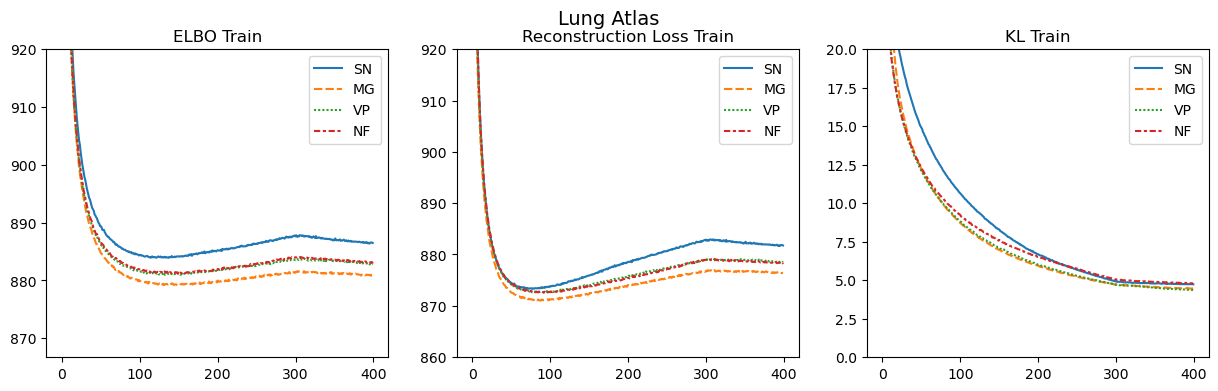

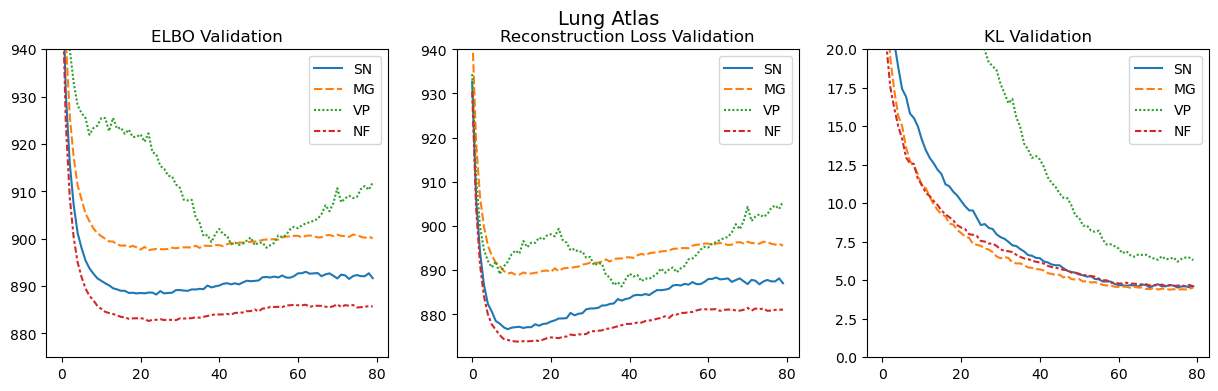

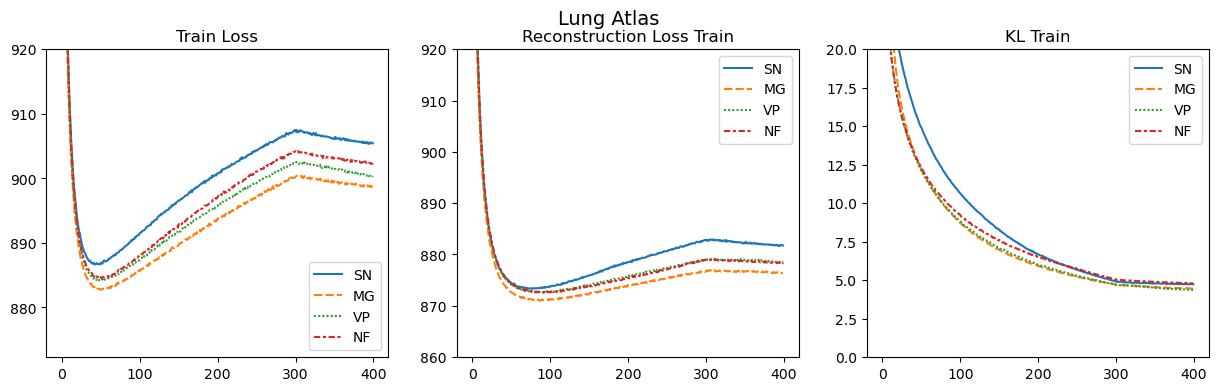

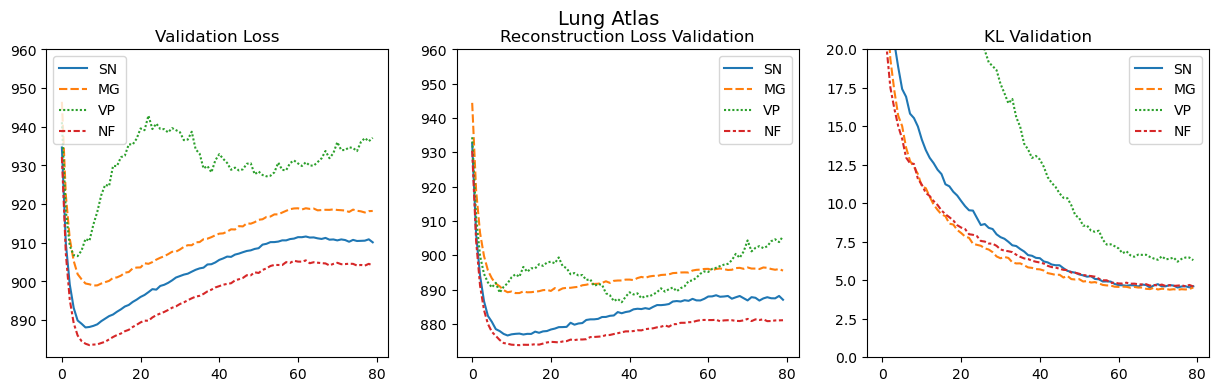

In [22]:
ylim1 = [920,940,920,960]
ylim2 = [20,20,20,20]
allPlots(dfLung_ELBOtrain, dfLung_ELBO_validation, dfLung_KL_local_train, dfLung_KL_local_validation, dfLung_reconstruction_loss_train, dfLung_reconstruction_loss_validation, dfLung_train_loss_epoch, dfLung_validation_loss,"Lung Atlas",ylim1,ylim2)

### Plots Pancreas

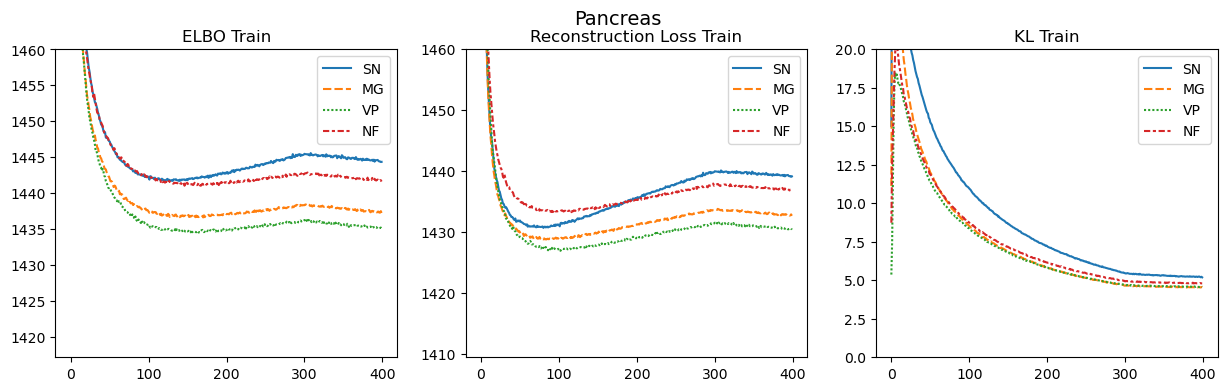

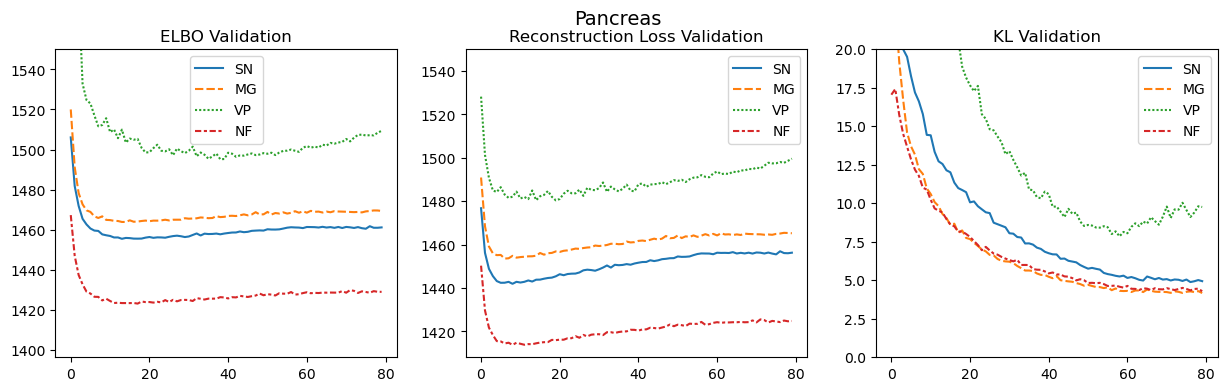

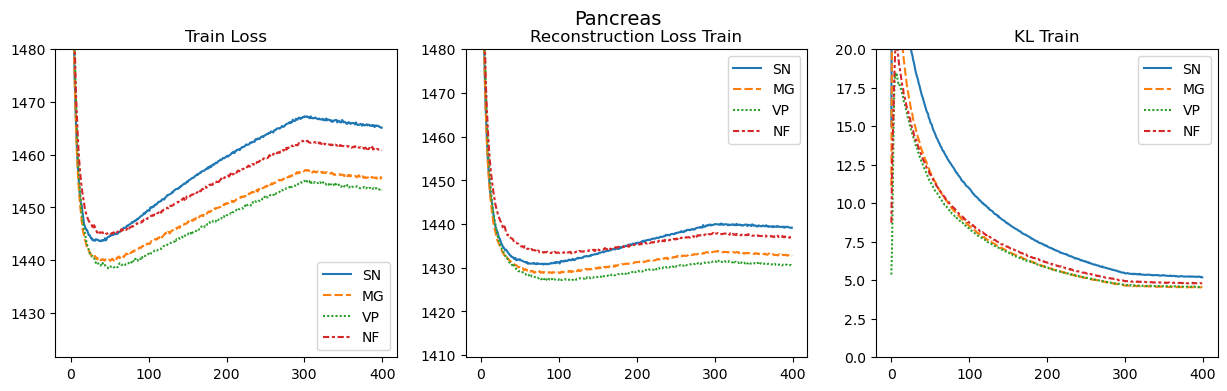

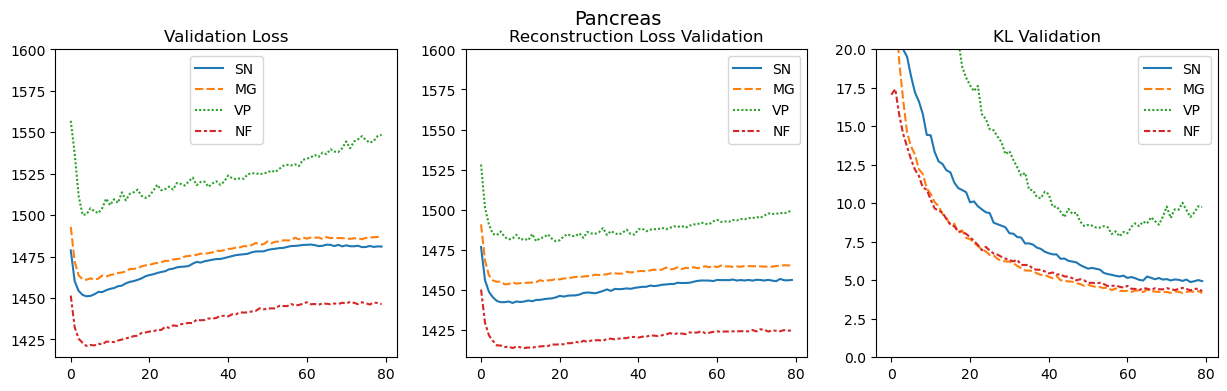

In [23]:
ylim1 = [1460,1550,1480,1600]
ylim2 = [20,20,20,20]
allPlots(dfPan_ELBOtrain,dfPan_ELBO_validation,dfPan_KL_local_train, dfPan_KL_local_validation, dfPan_reconstruction_loss_train, dfPan_reconstruction_loss_validation, dfPan_train_loss_epoch, dfPan_validation_loss,"Pancreas",ylim1,ylim2)

### Plot Immune Human

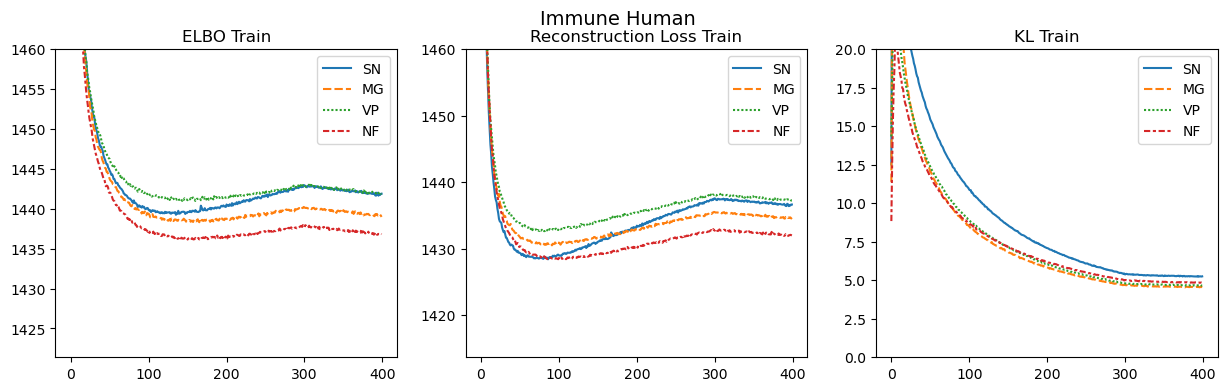

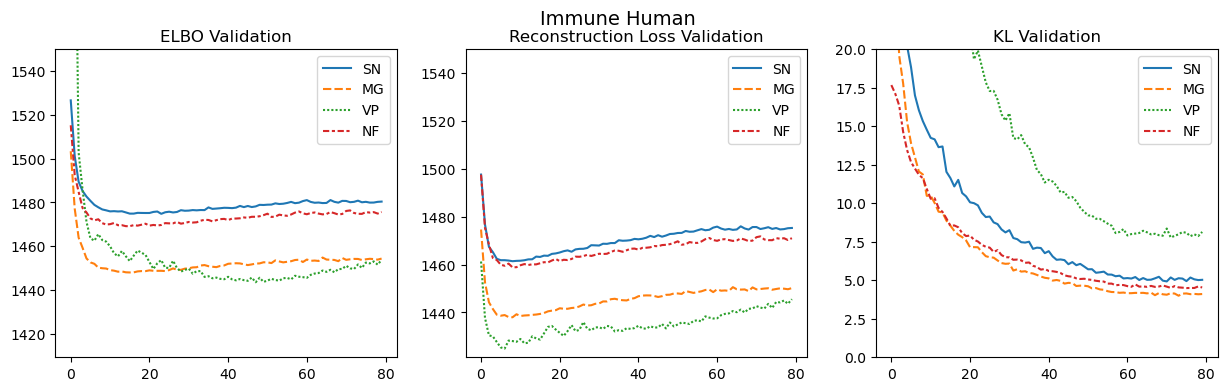

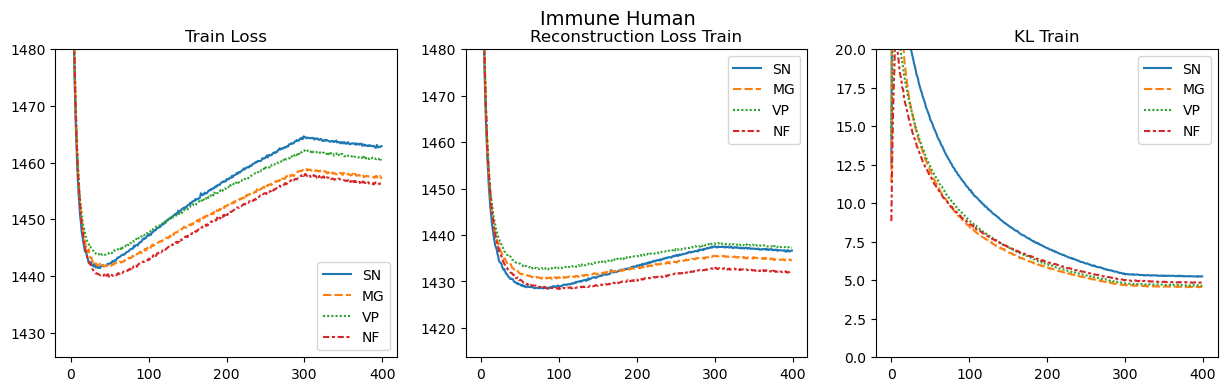

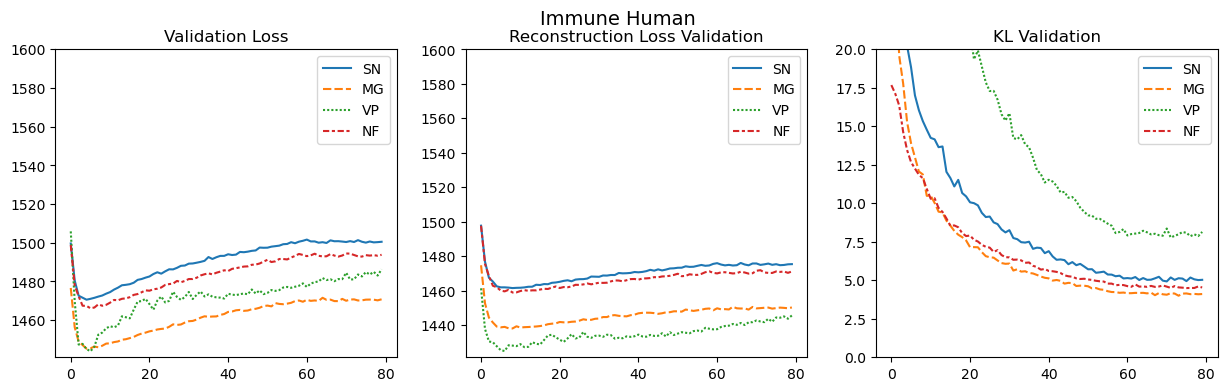

In [24]:
ylim1 = [1460,1550,1480,1600]
ylim2 = [20,20,20,20]
allPlots(dfImm_ELBOtrain,dfImm_ELBO_validation,dfImm_KL_local_train, dfImm_KL_local_validation, dfImm_reconstruction_loss_train, dfImm_reconstruction_loss_validation, dfImm_train_loss_epoch, dfImm_validation_loss,"Immune Human",ylim1,ylim2)

### Plot Immune Human Mouse

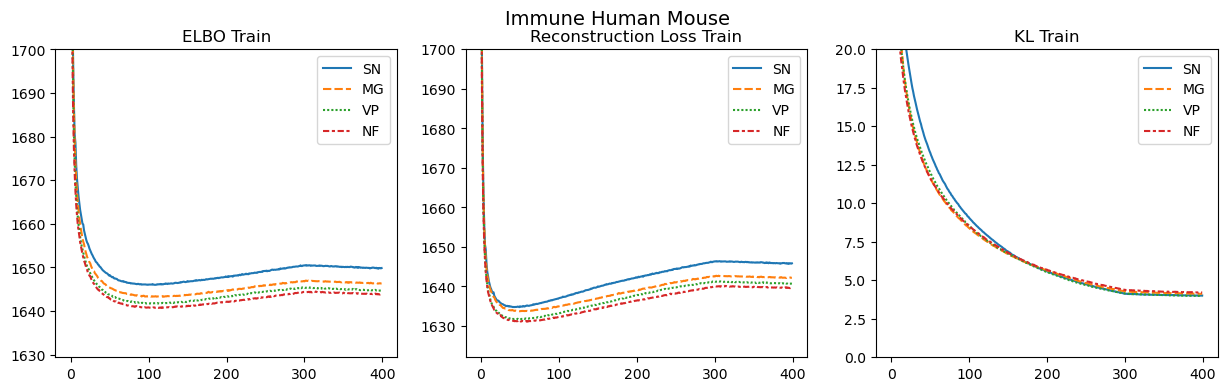

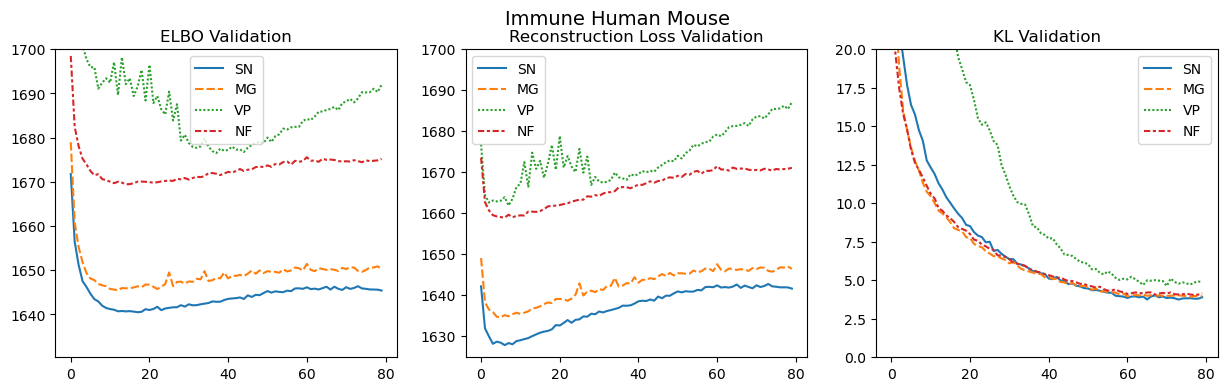

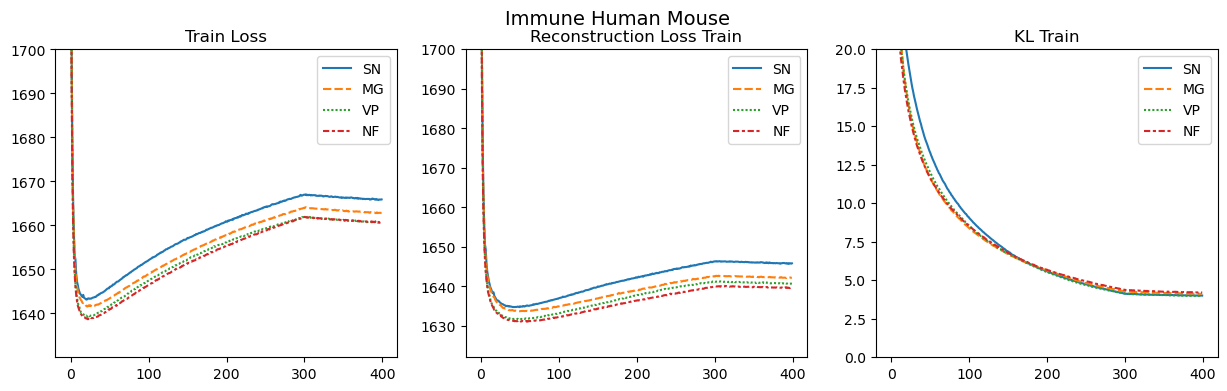

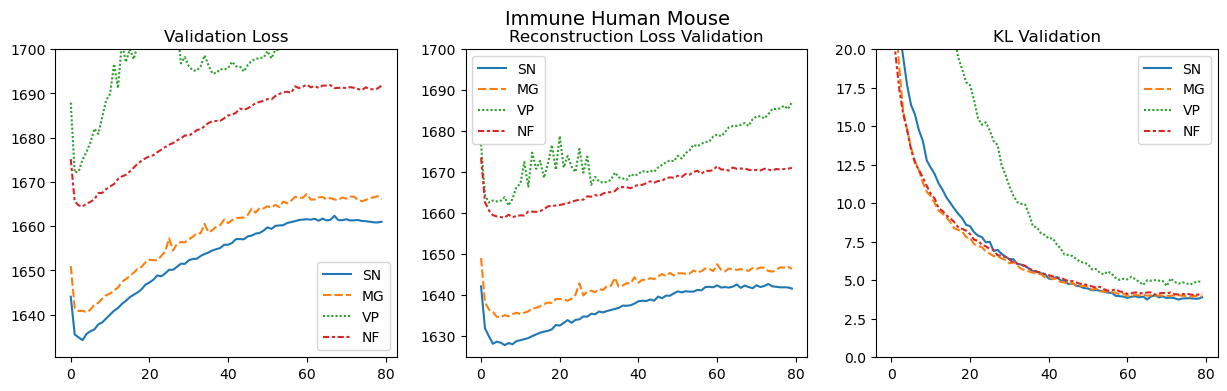

In [32]:
ylim1 = [1700,1700,1700,1700]
ylim2 = [20,20,20,20]
allPlots(dfMou_ELBOtrain,dfMou_ELBO_validation,dfMou_KL_local_train,dfMou_KL_local_validation,dfMou_reconstruction_loss_train,dfMou_reconstruction_loss_validation,dfMou_train_loss_epoch,dfMou_validation_loss,"Immune Human Mouse",ylim1,ylim2)

### Plot Times

In [26]:
def plotFour(df1,df2,df3,df4,tit1,tit2,tit3,tit4):
    fig, axes = plt.subplots(1,4,figsize=(15,4))
    plot1 = sns.lineplot(df1[["SN","MG","VP","NF"]],ax=axes[0])
    plot1.set_ylabel("Minutes")
    #plot1.set(ylim = (None, ylim1))
    plot1.set_title(tit1)
    plot2 = sns.lineplot(df2[["SN","MG","VP","NF"]],ax=axes[1])
    #plot2.set(ylim = (None, ylim1))
    plot2.set_title(tit2)
    plot3 = sns.lineplot(df3[["SN","MG","VP","NF"]],ax=axes[2])
    #plot3.set(ylim = (None, ylim1))
    plot3.set_title(tit3)
    plot4 = sns.lineplot(df4[["SN","MG","VP","NF"]],ax=axes[3])
    #plot4.set(ylim = (None, ylim1))
    plot4.set_title(tit4)
    fig.supxlabel('Epoch')

In [10]:
def prepTimeDF(df):
    sorted= df.sort_values(['SN'], ascending = [True])
    df = sorted.groupby('SN').first().reset_index()
    df[["SN","MG","VP","NF"]] = df[["Relative Time SD","Relative Time MG","Relative Time VP","Relative Time NF"]]/60
    return df

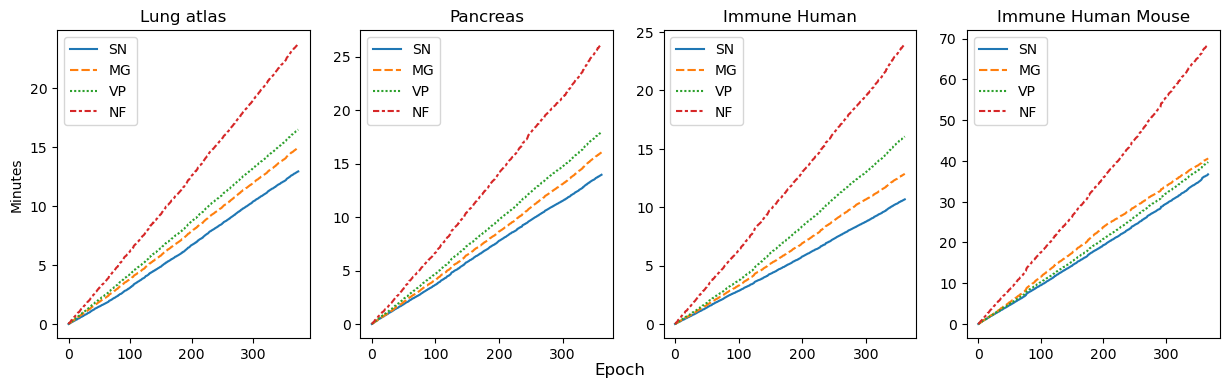

In [28]:
plotFour(prepTimeDF(dfLung_Epoch), prepTimeDF(dfPan_Epoch), prepTimeDF(dfImm_Epoch),prepTimeDF(dfMou_Epoch),"Lung atlas","Pancreas","Immune Human","Immune Human Mouse")